# Modeling Exotic Option Prices with Monte Carlo

**Brendan Reid, Calvin Combs, Dalton Fowler, Xander Struntz**

## Introduction

In [1]:
!pip install numpy
!pip install matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/bonk/.local/include/python3.8/UNKNOWN
sysconfig: /home/bonk/.local/include/python3.8
user = True
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = Fals

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generates matrix of stock paths.
# rows represent path of a stock at each time step.
# each stock starts from the same price.

# parameters:
# S0: initial stock price
# mu: expected return of stock
# sig: standard deviation of stock price
# dt: size of time step (annual; give 1/365 for daily)
# steps: number of time steps to generate
# numPaths: number of stock paths to generate
def assetPaths(S0,mu,sig,dt,steps,numPaths):
    drift = mu - sig*sig/2
    
    cProd = np.cumprod(np.exp(drift*dt+sig*np.sqrt(dt)*np.random.normal(0, 1, (steps,numPaths))), axis=0)

    # build array
    S = S0 * (np.vstack((np.ones((1,numPaths)), (cProd))))
    
    return S.T

We give some examples of calling `assetPaths()`. (This is for personal reference, we might want to delete these when we submit this project).

In [4]:
# Each row is a path
paths = assetPaths(100, .15, .3, 1/4, 5, 3)
pathOne = paths[0]
print(pathOne)

[100.         134.75949257 114.70710828 138.18363718 161.73787951
 198.25589412]


In [5]:
# Note: the asset paths are stored in rows, not the columns, of the matrix.
# Thus the first column is the initial price of each asset
print(paths.T[0])

[100. 100. 100.]


In [6]:
# A different path:
pathTwo = paths[1]
print(pathTwo)

[100.         114.54094179  93.46245589  93.82231916  97.05429751
 100.29812058]


In [7]:
# compute a discrete integral

# parameters:
# arr: an array. Must only contain numeric types.
def discreteIntegral(arr):
    result = 0
        
    for i in range(0, len(arr)):
        result += arr[i] * (1 / len(arr))
        
    return result

In [8]:
# We give some examples of calling discreteIntegral

# we expect 1/3 (1 + 2 + 3) = 2
print(discreteIntegral([1, 2, 3]))

paths = assetPaths(100, .8, .9, 1/12, 10, 5)[0]
print(discreteIntegral(paths))

2.0
281.0267701731696


In [9]:
# Simple functions to find the max and min of a array.
# We will be using these to help plot our outputs.

# NOTE: I thought I needed this for plotting but it appears not
# leaving incase we need at another time.
def getMax(arr):
    max = arr[0]
    for x in arr[1:]:
        if x > max:
            max = x
    return max

def getMin(arr):
    min = arr[0]
    for x in arr[1:]:
        if x < min:
            min = x
    return min

In [10]:
# Here we test the functions by a very straightforward test
print(getMax(pathOne), getMin(pathOne), sep="|")
print(getMax(pathTwo), getMin(pathTwo), sep="|")

198.2558941242221|100.0
114.54094178678189|93.4624558934154


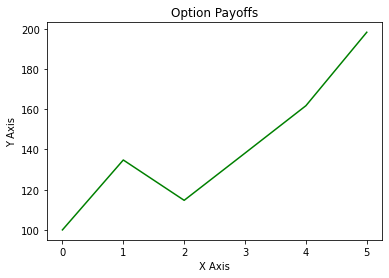

In [11]:
# Plot the first asset path
plt.title("Option Payoffs")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
x = np.arange(0, len(pathOne))
y = np.array(pathOne)
plt.plot(x, y, color = "green")
plt.show()

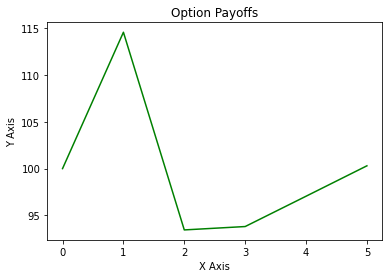

In [12]:
# Plot the second asset path
plt.title("Option Payoffs")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
x = np.arange(0, len(pathTwo))
y = np.array(pathTwo)
plt.plot(x, y, color = "green")
plt.show()

Option Payoff Functions

In [13]:
# All functions have one or more of these parameters

# path: path taken by the asset
# K: strike price

Asian:

In [14]:
# Compute the payoff of an asian average price call option

# parameters:
# path: path taken by the asset
# K: strike price
def asianAvgPriceCall(path, K):
    avgPrice = discreteIntegral(path)
    intrinsic = avgPrice - K
    
    return intrinsic if intrinsic > 0 else 0

In [15]:
def asianAvgPricePut(path, K):
    avgPrice = discreteIntegral(path)
    intrinsic = K - avgPrice
    
    return intrinsic if intrinsic > 0 else 0

In [16]:
def asianAvgStrikeCall(path):
    avgPrice = discreteIntegral(path)
    S_T = path[len(path) - 1]
    intrinsic = S_T - avgPrice
    
    return intrinsic if intrinsic > 0 else 0

In [17]:
def asianAvgStrikePut(path):
    avgPrice = discreteIntegral(path)
    S_T = path[len(path) - 1]
    intrinsic = avgPrice - S_T
    
    return intrinsic if intrinsic > 0 else 0

Lookback:

In [18]:
def lookbackFixedCall(path, K):
    Smax = getMax(path)
    intrinsic = Smax - K
    
    return intrinsic if intrinsic > 0 else 0

In [19]:
def lookbackFixedPut(path, K):
    Smin = getMin(path)
    intrinsic = K - Smin
    
    return intrinsic if intrinsic > 0 else 0

In [20]:
def lookbackFloatingCall(path):
    S_T = path[len(path) - 1]
    Smin = getMin(path)
    
    intrinsic = S_T - Smin
        
    return intrinsic if intrinsic > 0 else 0

In [21]:
def lookbackFloatingPut(path):
    S_T = path[len(path) - 1]
    Smax = getMax(path)
    
    intrinsic = Smax - S_T
        
    return intrinsic if intrinsic > 0 else 0

In [22]:
# TODO: chooser

Knock in

In [23]:
# Note barrier options can use the following parameters.

# parameters:
# rebate: payoff given when the threshold is passed
# B: threshold at which the rebate is returned

In [122]:
def downInCall(path, B, K, rebate):
    if getMin(path) <= B:
        S_T = path[len(path) - 1]
        intrinsic = S_T - K
                
        return intrinsic if intrinsic > 0 else 0
    
    # TODO: what does rebate take?
    return rebate()

def downInPut(path, B, K, rebate):
    if getMin(path) <= B:
        S_T = path[len(path) - 1]
        intrinsic = K - S_T
                
        return intrinsic if intrinsic > 0 else 0
    
    # TODO: what does rebate take?
    return rebate()

In [124]:
def upInCall(path, B, K, rebate):
    if getMax(path) >= B:
        S_T = path[len(path) - 1]
        intrinsic = S_T - K
                
        return intrinsic if intrinsic > 0 else 0
    
    # TODO: what does rebate take?
    return rebate()

def upInPut(path, B, K, rebate):
    if getMax(path) >= B:
        S_T = path[len(path) - 1]
        intrinsic = K - S_T
                
        return intrinsic if intrinsic > 0 else 0
    
    # TODO: what does rebate take?
    return rebate()

Knock Out

In [161]:
def downOutCall(path, B, K, rebate):
    if getMin(path) <= B:
        return rebate()
    
    S_T = path[len(path) - 1]
    intrinsic = S_T - K
    
    return intrinsic if intrinsic > 0 else 0

def downOutPut(path, B, K, rebate):
    if getMin(path) <= B:
        return rebate()
    
    S_T = path[len(path) - 1]
    intrinsic = K - S_T
    
    return intrinsic if intrinsic > 0 else 0

def upOutCall(path, B, K, rebate):
    if getMax(path) >= B:
        return rebate()
    
    S_T = path[len(path) - 1]
    intrinsic = S_T - K
    
    return intrinsic if intrinsic > 0 else 0

def upOutPut(path, B, K, rebate):
    if getMax(path) >= B:
        return rebate()
    
    S_T = path[len(path) - 1]
    intrinsic = K - S_T
    
    return intrinsic if intrinsic > 0 else 0

Option Payoff Tests

Asian:

In [141]:
# Asian average price call positive

path = [100, 100, 100, 100]
strike = 75

if (asianAvgPriceCall(path, strike) != 25):
    print("Test failed! Asian Average Price Call Option produced wrong payoff")
    
# Asian average price call zero

path = [100, 57, 88, 120]
strike = 150

if (asianAvgPriceCall(path, strike) != 0):
    print("Test failed! Asian Average Price Call Option produced wrong payoff")

In [142]:
#Asian average price put zero

path = [100, 110, 100, 200]
strike = 75

if (asianAvgPricePut(path, strike) != 0):
    print("Test failed! Asian Average Price Put Option produced wrong payoff")
    
#Asian average price put positive

path = [50, 50, 50, 50]
strike = 75

if (asianAvgPricePut(path, strike) != 25):
    print("Test failed! Asian Average Price Put Option produced wrong payoff")

In [143]:
#Asian average strike call positive

path = [50, 0, 40, 100]

if (asianAvgStrikeCall(path) != 100 - 47.5):
    print("Test failed! Asian Average Strike Call Option produced wrong payoff")
    
#Asian average strike call zero

path = [50000, 0, 40, 100]

if (asianAvgStrikeCall(path) != 0):
    print("Test failed! Asian Average Strike Call Option produced wrong payoff")

In [144]:
#Asian average strike put positive

path = [50, 0, 0, 40, 10]

if (asianAvgStrikePut(path) != 20 - 10):
    print("Test failed! Asian Average Strike Put Option produced wrong payoff")
    
#Asian average strike put zero

path = [0, 0, 40, 100]

if (asianAvgStrikePut(path) != 0):
    print("Test failed! Asian Average Strike Put Option produced wrong payoff")

Lookback:

In [145]:
# Lookback fixed call positive

path = [50, 0, 100, 99]

if (lookbackFixedCall(path, 75) != 25):
    print("Test failed! Lookback fixed call produced wrong payoff")

# Lookback fixed call zero

path = [50, 0, 50, 45]

if (lookbackFixedCall(path, 75) != 0):
    print("Test failed! lookback fixed call produced wrong payoff")

In [146]:
# Lookback fixed put positive

path = [50, 0, 100, 99]

if (lookbackFixedPut(path, 75) != 75):
    print("Test failed! Lookback fixed call produced wrong payoff")

# Lookback fixed put zero

path = [500, 1000, 500, 450]

if (lookbackFixedPut(path, 75) != 0):
    print("Test failed! lookback fixed call produced wrong payoff")

In [147]:
# Lookback float call positive

path = [50, 30, 100, 101]

if (lookbackFloatingCall(path) != 71):
    print("Test failed! Lookback float call produced wrong payoff 1")

# Lookback fixed call zero

path = [50, 70, 50, 20]

if (lookbackFloatingCall(path) != 0):
    print("Test failed! lookback float call produced wrong payoff 2")

In [148]:
# Lookback float put positive

path = [50, 0, 100, 99]

if (lookbackFloatingPut(path) != 1):
    print("Test failed! Lookback float call produced wrong payoff 1")

# Lookback float put zero

path = [50, 0, 50, 60]

if (lookbackFloatingPut(path) != 0):
    print("Test failed! lookback float call produced wrong payoff 2")

In [149]:
# This rebate is used in all tests

def rebate():
    return 123

In [150]:
# Down In non-rebate

path = [50, 0, 100, 70]

if (downInCall(path, 60, 40, rebate) != 70-40):
    print("Test failed! down and in call produced wrong payoff 1")

# Down in rebate

path = [50, 30, 50, 60]

if (downInCall(path, 20, 40, rebate) != rebate()):
    print("Test failed! down and in call produced wrong payoff 2")

In [151]:
# Down In non-rebate

path = [50, 0, 100, 20]

if (downInPut(path, 60, 40, rebate) != 40-20):
    print("Test failed! down and in put produced wrong payoff 1")

# Down in rebate

path = [50, 30, 50, 60]

if (downInPut(path, 20, 40, rebate) != rebate()):
    print("Test failed! down and in put produced wrong payoff 2")

In [152]:
# Up In non-rebate

path = [50, 0, 100, 70]

if (upInCall(path, 60, 40, rebate) != 70-40):
    print("Test failed! up and in call produced wrong payoff 1")

# Up in rebate

path = [50, 30, 50, 60]

if (upInCall(path, 90, 40, rebate) != rebate()):
    print("Test failed! up and in call produced wrong payoff 2")

In [153]:
# Up In non-rebate

path = [50, 0, 100, 20]

if (upInPut(path, 60, 40, rebate) != 40-20):
    print("Test failed! up and in call produced wrong payoff 1")

# Up in rebate

path = [50, 30, 50, 60]

if (upInPut(path, 90, 40, rebate) != rebate()):
    print("Test failed! up and in call produced wrong payoff 2")

In [154]:
# Down out non-rebate

path = [70, 70, 100, 80]

if (downOutCall(path, 60, 40, rebate) != 80-40):
    print("Test failed! down and out call produced wrong payoff 1")

# Down out rebate

path = [50, 30, 50, 60]

if (downOutCall(path, 40, 40, rebate) != rebate()):
    print("Test failed! down and out call produced wrong payoff 2")

In [155]:
# Down out non-rebate

path = [70, 70, 100, 80]

if (downOutPut(path, 60, 100, rebate) != 100-80):
    print("Test failed! down and out call produced wrong payoff 1")

# Down out rebate

path = [50, 30, 50, 60]

if (downOutPut(path, 40, 40, rebate) != rebate()):
    print("Test failed! down and out call produced wrong payoff 2")

In [162]:
# up out non-rebate

path = [70, 70, 100, 80]

if (upOutCall(path, 110, 40, rebate) != 80-40):
    print("Test failed! up and out call produced wrong payoff 1")

# up out rebate

path = [50, 30, 50, 60]

if (upOutCall(path, 40, 40, rebate) != rebate()):
    print("Test failed! up and out call produced wrong payoff 2")

In [164]:
# up out non-rebate

path = [70, 70, 100, 80]

if (upOutPut(path, 110, 400, rebate) != 400-80):
    print("Test failed! up and out call produced wrong payoff 1")

# up out rebate

path = [50, 30, 50, 60]

if (upOutPut(path, 40, 40, rebate) != rebate()):
    print("Test failed! up and out call produced wrong payoff 2")